# Mean of the distribution of lengths in the different group of organisms
**in the protein coding gene length distributions for the different species**

## Import python modules

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../../gl_lib/')
import gl_constants as c

## The protein coding gene length distributions for the different species

### Retrieving the statistical descriptions of the gene length's distributions

#### Statistical description 

In [2]:
# statistics on length distributions 
stat_file = c.STAT_G_FILE
print("The statistical descriptions of the protein coding gene distributions " + \
    "for the different species is in:\n", stat_file, "\n")

# retrieve data and diminish the number of columns
stat_df = pd.read_csv(stat_file, low_memory=False, sep="\t")
stat_df = stat_df[["division_both_dbs", "species", "count", "mean", "var", "log10_mean", "log10_var"]]

# visualize data
if 1:
    pd.set_option('display.max_columns', len(stat_df.columns))
    display(stat_df.sample(2))
    print(stat_df.shape)
    print(stat_df["division_both_dbs"].value_counts())

The statistical descriptions of the protein coding gene distributions for the different species is in:
 /home/emuro/git/github/EM_geneLength_nature/main_work/suppl_work/../../gl_lib/../main_tables/stat_protCodGenes.tsv 



,division_both_dbs,species,count,mean,var,log10_mean,log10_var
33087,protists,plasmodium_gonderi_gca_002157705,5916,2426.989689,6.049565e+06,3.246751,0.111318
10044,bacteria,marinobacter_sp__gca_003539345,3602,760.666574,3.083007e+05,2.772226,0.101309


(33627, 7)
division_both_dbs
bacteria         30714
archaea           1229
fungi             1014
protists           237
vertebrates        222
invertebrates      115
plants              96
Name: count, dtype: int64


## $<L>$ histogram

archaea
count    1229.000000
mean      834.838258
std        80.439432
min       395.933333
25%       791.161435
50%       846.641304
75%       879.990714
max      1181.906073
Name: mean, dtype: float64


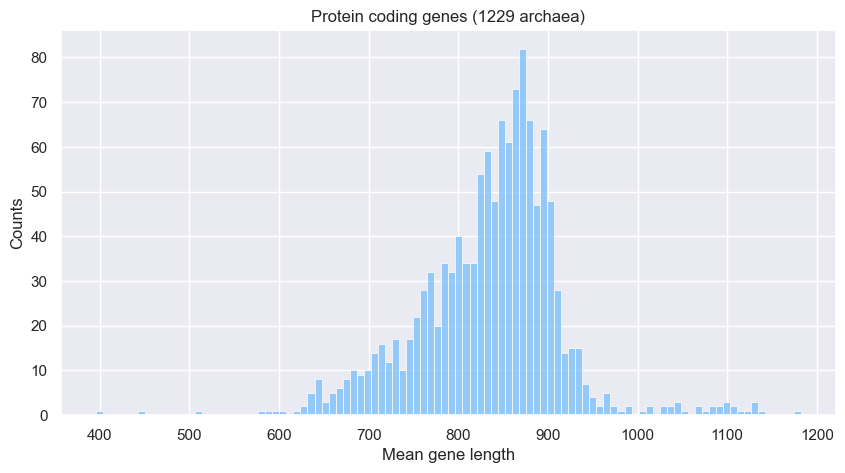

bacteria
count    30714.000000
mean       942.991035
std         76.549769
min        452.684851
25%        902.371160
50%        944.827334
75%        985.652610
max       1306.264577
Name: mean, dtype: float64


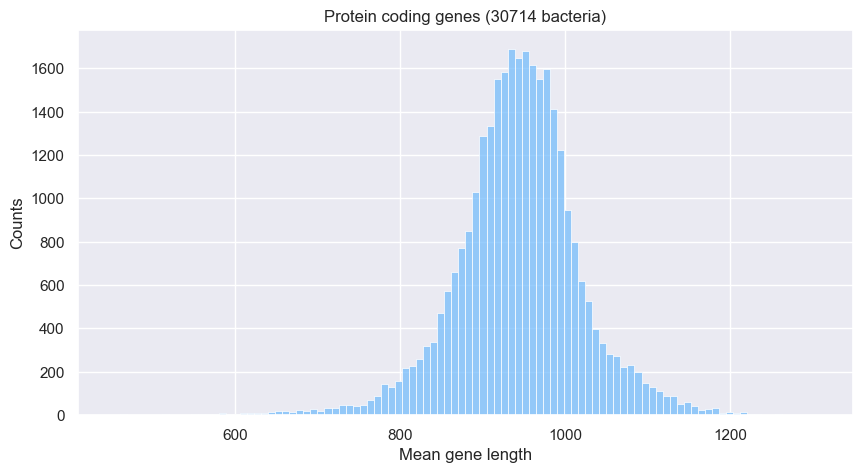

protists
count      237.000000
mean      2059.139453
std       1089.415802
min        679.553838
25%       1487.206671
50%       1798.289527
75%       2358.855279
max      12164.651890
Name: mean, dtype: float64


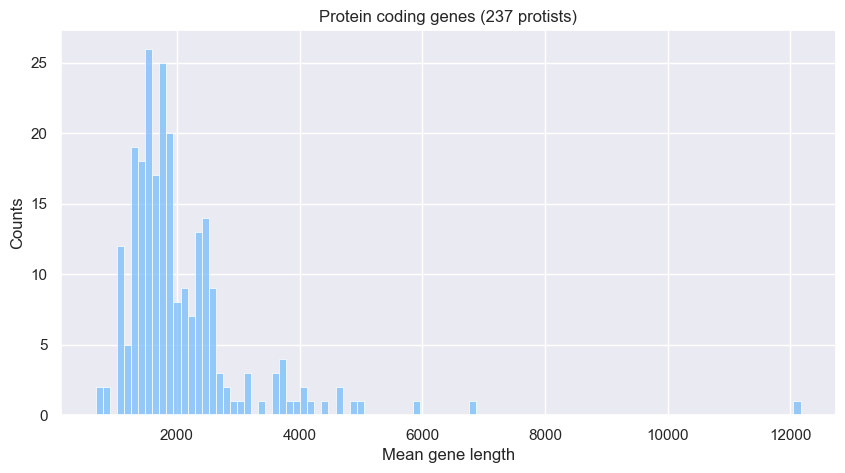

fungi
count    1014.000000
mean     1672.224559
std       304.288468
min       530.847826
25%      1493.055354
50%      1620.808764
75%      1801.365068
max      2580.356803
Name: mean, dtype: float64


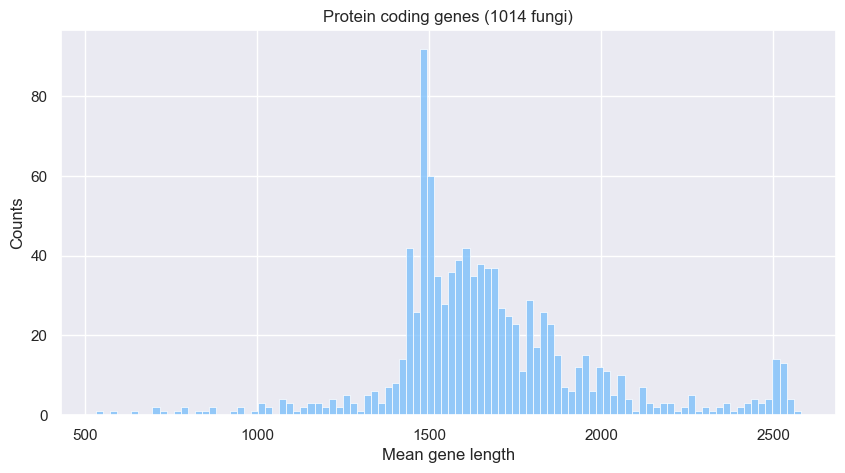

In [3]:
col_x = "mean"  # prots_mean
col_y = "var"   # prots_var
legends_by = "division_both_dbs"
#
title_template = "Protein coding genes" 
x_lab = "Mean gene length"   
y_lab = "Counts"
#
#
Lg_df = stat_df.copy()
Lg_df = Lg_df[['division_both_dbs', 'mean', 'var']] 

# sort by groups of organisms
Lg_df[legends_by] = pd.Categorical(Lg_df[legends_by], 
                                  categories=c.ORG_GROUPS,
                                  ordered=True)
Lg_df.sort_values(legends_by, inplace=True)

for group in ["archaea", "bacteria", "protists", "fungi"]:
    group_Lg_df = Lg_df.loc[Lg_df[legends_by]==group]
    print(group, group_Lg_df['mean'].describe(), sep="\n")

    title = title_template + " (" + str(group_Lg_df.shape[0]) + " " + str(group) + ")"
    sns.set_theme()
    fig, ax = plt.subplots(figsize=(10, 5))  
    ax.set(title=title, xlabel=x_lab, ylabel=y_lab)
    sns.histplot(data=group_Lg_df, x="mean", bins=100, color=c.COLOR_FOR_DIST["genes"]) #, stat="density")
    plt.show()